Import Libraries

In [ ]:
%load_ext autoreload
%autoreload 2
import pandas as pd
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

import matplotlib.pyplot as plt
import os

# set up initial path to data
DATADIR = os.path.join("sample-data","data")
game_id = 2 # let's look at sample match 2

Import Metrics

In [ ]:
import Metrica_IO as mio
import Metrica_Viz as mviz

Read datasets

In [ ]:
# read in the event data
events = mio.read_event_data(DATADIR,game_id)
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

Merge the two tracking DataFrames based on the 'Time [s]' column, which is common to both

In [ ]:
tracking_data = pd.merge(tracking_away, tracking_home, on='Time [s]', how='outer')

# Sort the combined DataFrame by the 'Time [s]' column
tracking_data = tracking_data.sort_values(by='Time [s]')

# Reset the index of the combined DataFrame
tracking_data.reset_index(drop=True, inplace=True)

# fill NaN values with 0:
tracking_data.fillna(0, inplace=True)
tracking_data

In [ ]:
# Specify the columns to be removed
columns_to_remove = ['ball_x_y', 'ball_y_y', 'Period_y']

# Use the drop method to remove the specified columns
tracking_data = tracking_data.drop(columns=columns_to_remove)

In [ ]:
tracking_data

In [ ]:
tracking_data.columns

In [ ]:
# Assuming 'styled_tracking_data' is your DataFrame
columns_to_drop = [
    'Away_16_x', 'Away_16_y', 'Away_17_x', 'Away_17_y',
    'Away_18_x', 'Away_18_y', 'Away_19_x', 'Away_19_y',
    'Away_20_x', 'Away_20_y', 'Away_21_x', 'Away_21_y',
    'Away_22_x', 'Away_22_y', 'Away_23_x', 'Away_23_y',
    'Away_24_x', 'Away_24_y', 'Away_26_x', 'Away_26_y', 'Away_15_y', 'Away_15_x',
    'Home_1_x', 'Home_1_y', 'Home_3_x', 'Home_3_y', 'Home_4_x', 'Home_4_y',
    'Home_5_x', 'Home_5_y', 'Home_6_x' ,'Home_6_y', 'Home_7_x', 'Home_7_y', 'Home_8_x','Home_8_y'  ,'Home_9_x' ,
    'Home_9_y', 'Home_10_x', 'Home_10_y','Home_12_x', 'Home_12_y','Home_13_x', 'Home_13_y',
    'Home_14_x','Home_14_y', 'Home_2_x','Home_2_y' 

]

df = tracking_data.drop(columns=columns_to_drop)

rows_to_display = [50, 80, 200, 400, 500]
tracking_data_subset = df.iloc[rows_to_display]

styled_data = tracking_data_subset.style.applymap(lambda x: 'color: darkred; text-shadow: 1px 1px 1px #888; background-color: antiquewhite; font-size: 13px; text-align: center;', subset=pd.IndexSlice[:, :]) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('color', 'black')]
    }])
# Generate an HTML representation

styled_html = styled_data.render()

# Save the HTML to a file
with open('styled_tracking_data.html', 'w') as f:
    f.write(styled_html)

print("Styled DataFrame has been saved to 'styled_tracking_data.html'")


In [ ]:
# read in the event data
event_data = mio.read_event_data(DATADIR,game_id)

# Bit of housekeeping: unit conversion from metric data units to meters
event_data = mio.to_metric_coordinates(events)

In [ ]:
event_data.columns

In [ ]:
# Select the specific rows
rows_to_display = [10, 50, 100, 700, 800]
event_data_subset = event_data.iloc[rows_to_display]

styled_data = event_data_subset.style.applymap(lambda x: 'color: darkred; text-shadow: 1px 1px 1px #888; background-color: antiquewhite; font-size: 13px; text-align: center;', subset=pd.IndexSlice[:, :]) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('color', 'black')]
    }])
# Generate an HTML representation

styled_html = styled_data.render()

# Save the HTML to a file
with open('styled_event_data.html', 'w') as f:
    f.write(styled_html)

print("Styled DataFrame has been saved to 'styled_event_data.html'")

In [ ]:
# Merge the datasets based on 'Start Time [s]'
merged_end = pd.merge(event_data, tracking_data, left_on='End Time [s]', right_on='Time [s]', how='left')

# Rename columns with '_x' suffix to avoid conflicts
merged_end.columns = [col if '_x' not in col else col[:-2] for col in merged_end.columns]

# Remove duplicate rows based on the 'event_data' columns
merged_end = merged_end.drop_duplicates(subset=['Team', 'Type', 'Subtype', 'Period', 'Start Frame', 'Start Time [s]', 'End Frame', 'End Time [s]', 'From', 'To', 'Start X', 'Start Y', 'End X', 'End Y'])

# Reset the index
merged_end = merged_end.reset_index(drop=True)

In [ ]:
# Merge the datasets based on 'Start Time [s]'
merged_start = pd.merge(event_data, tracking_data, left_on='Start Time [s]', right_on='Time [s]', how='left')

# Rename columns with '_x' suffix to avoid conflicts
merged_start.columns = [col if '_x' not in col else col[:-2] for col in merged_start.columns]

# Remove duplicate rows based on the 'event_data' columns
merged_start = merged_start.drop_duplicates(subset=['Team', 'Type', 'Subtype', 'Period', 'Start Frame', 'Start Time [s]', 'End Frame', 'End Time [s]', 'From', 'To', 'Start X', 'Start Y', 'End X', 'End Y'])

# Reset the index
merged_start = merged_start.reset_index(drop=True)

In [ ]:
merged_start


In [ ]:
merged_end

#### Define Metrics

In [ ]:
pass_start = merged_start[merged_start['Type'] == 'PASS']

In [ ]:
pass_start = pd.DataFrame(pass_start)

In [ ]:
type(pass_start)

In [ ]:
pass_start

Calculate Number Of the apponents in the area of 5m from the ball

In [ ]:
pass_start['app_num'] = 0  # Initialize the app_num column

# Iterate through each row of the DataFrame
for index, row in pass_start.iterrows():
    ho_app = 0
    aw_app = 0
    if row['Team'] == 'Home':
        # Calculate the distance to each Away player and append it to the list
        for player in range(15, 27):  # Assuming player IDs are from 15 to 26
            distance = ((row['Start X'] - row[f'Away_{player}']) ** 2 + (row['Start Y'] - row[f'Away_{player}_y']) ** 2) ** 0.5
            if distance<=5 :
                ho_app = ho_app + 1
        pass_start.at[index, 'app_num'] = ho_app
    elif row['Team'] == 'Away':
        # Calculate the distance to each Home player and append it to the list
        for player in range(1, 15):  # Assuming player IDs are from 1 to 14
            distance = ((row['Start X'] - row[f'Home_{player}']) ** 2 + (row['Start Y'] - row[f'Home_{player}_y']) ** 2) ** 0.5
            if distance<=5 :
                aw_app = aw_app + 1
        pass_start.at[index, 'app_num'] = aw_app

In [ ]:
pass_start

Calculate Number Of the Team players (the side who posses the ball) in the area of 5m from the ball

In [ ]:
pass_start['teammate_num'] = 0  # Initialize the teammate numbers column

# Iterate through each row of the DataFrame
for index, row in pass_start.iterrows():
    ho_teammates = 0
    aw_teammates = 0
    if row['Team'] == 'Home':
        # Calculate the distance to each Away player and append it to the list
        for player in range(1,15):  # Assuming Home player IDs are from 1 to 14
            distance = ((row['Start X'] - row[f'Home_{player}']) ** 2 + (row['Start Y'] - row[f'Home_{player}_y']) ** 2) ** 0.5
            if distance<=5 :
                ho_teammates = ho_teammates + 1
        pass_start.at[index, 'teammate_num'] = ho_teammates
    elif row['Team'] == 'Away':
        # Calculate the distance to each Home player and append it to the list
        for player in range(15, 27):  # Assuming Away player IDs are from 15 to 26
            distance = ((row['Start X'] - row[f'Away_{player}']) ** 2 + (row['Start Y'] - row[f'Away_{player}_y']) ** 2) ** 0.5
            if distance<=5 :
                aw_teammates = aw_teammates + 1
        pass_start.at[index, 'teammate_num'] = aw_teammates

# Create a new column 'teammate numberss' in the DataFrame and assign the calculated aw_app or ho_app


In [ ]:
pass_start

Determine the ratio of opponents to players in possession of the ball.

In [ ]:
pass_start['ratio_s'] = 0  # Initialize the teammate numbers column

# Iterate through each row of the DataFrame
for index, row in pass_start.iterrows():
   pass_start.at[index, 'ratio_s'] = row['app_num'] / row['teammate_num']

In [ ]:
pass_start

Calculate the ratio this time for the merged_end dataset

In [ ]:
pass_end = merged_end[merged_end['Type'] == 'PASS']
pass_end = pd.DataFrame(pass_end)

##Calculate Number Of the apponents in the area of 5m from the ball

pass_end['app_num'] = 0  # Initialize the app_num column

# Iterate through each row of the DataFrame
for index, row in pass_end.iterrows():
    ho_app = 0
    aw_app = 0
    if row['Team'] == 'Home':
        # Calculate the distance to each Away player and append it to the list
        for player in range(15, 27):  # Assuming player IDs are from 15 to 26
            distance = ((row['Start X'] - row[f'Away_{player}']) ** 2 + (row['Start Y'] - row[f'Away_{player}_y']) ** 2) ** 0.5
            if distance<=5 :
                ho_app = ho_app + 1
        pass_end.at[index, 'app_num'] = ho_app
    elif row['Team'] == 'Away':
        # Calculate the distance to each Home player and append it to the list
        for player in range(1, 15):  # Assuming player IDs are from 1 to 14
            distance = ((row['Start X'] - row[f'Home_{player}']) ** 2 + (row['Start Y'] - row[f'Home_{player}_y']) ** 2) ** 0.5
            if distance<=5 :
                aw_app = aw_app + 1
        pass_end.at[index, 'app_num'] = aw_app

##Calculate Number Of the Team players (the side who posses the ball) in the area of 5m from the ball

pass_end['teammate_num'] = 0  # Initialize the teammate numbers column
# Iterate through each row of the DataFrame
for index, row in pass_end.iterrows():
    ho_teammates = 0
    aw_teammates = 0
    if row['Team'] == 'Home':
        # Calculate the distance to each Away player and append it to the list
        for player in range(1,15):  # Assuming Home player IDs are from 1 to 14
            distance = ((row['End X'] - row[f'Home_{player}']) ** 2 + (row['End Y'] - row[f'Home_{player}_y']) ** 2) ** 0.5
            if distance<=5 :
                ho_teammates = ho_teammates + 1
        pass_end.at[index, 'teammate_num'] = ho_teammates
    elif row['Team'] == 'Away':
        # Calculate the distance to each Home player and append it to the list
        for player in range(15, 27):  # Assuming Away player IDs are from 15 to 26
            distance = ((row['End X'] - row[f'Away_{player}']) ** 2 + (row['End Y'] - row[f'Away_{player}_y']) ** 2) ** 0.5
            if distance<=5 :
                aw_teammates = aw_teammates + 1
        pass_end.at[index, 'teammate_num'] = aw_teammates

##Determine the ratio of opponents to players in possession of the ball.

pass_end['ratio_e'] = 0  # Initialize the teammate numbers column
# Iterate through each row of the DataFrame
for index, row in pass_end.iterrows():
   pass_end.at[index, 'ratio_e'] = row['app_num'] / row['teammate_num']



In [ ]:
pass_end

Find the difference between the two ratios >> The more the better

In [ ]:
pass_start['diff_ratio'] = pass_start['ratio_s'] - pass_end['ratio_e']

Assign Rates

In [ ]:
pass_start['r_ratio'] = (pass_start['diff_ratio']/2) * 0.2
pass_start

#2 Calculate the difference between the number of opponents and the number of teammates near the player who received the pass. >> The less the better

In [ ]:
pass_end['diff_app_mate'] = pass_end['app_num'] - pass_end['teammate_num']

Assign Rates

In [ ]:
pass_end['r_diff'] = (pass_end['diff_app_mate']/2) * 0.1
pass_end

#3 Determine the distance covered by the ball during the pass.

In [ ]:
# Initialize an empty list to store 'PassVector' values, it shows both the magnitude and the direction of the ball during the pass
pass_vectors = []

# Loop through each row in the DataFrame
for index, row in pass_start.iterrows():
    if row['End X'] < row['Start X']:
        pass_vectors.append(((((row['End X'] - row['Start X'])**2 + (row['End Y'] - row['Start Y'])**2) ** 0.5) * -1))
    else:
        pass_vectors.append(((row['End X'] - row['Start X'])**2 + (row['End Y'] - row['Start Y'])**2) ** 0.5)

# Add the 'PassVector' values to the DataFrame
pass_start['PassVector'] = pass_vectors

Assign Rates

In [ ]:
pass_start['r_len'] = (pass_start['PassVector']/10) * 0.1
pass_start

In [ ]:
pass_end['End X'].unique()

In [ ]:
pass_end['End Y'].unique()

#4 Determine if the Pass Reciever is in the Penalty Area of the apponent team

In [ ]:
pass_end['penalty_area'] = 0  # Initialize the new column with zeros

In [ ]:
for i, column in enumerate(pass_start.columns):
    print(f"Column {i}: {column}")

In [ ]:
pass_end.loc[(pass_end.iloc[:, 3] == 1) & (pass_end.iloc[:, 0] == 'Home') &  (pass_end.iloc[:, 12] <= -43.5) & (pass_end.iloc[:, 13] >= -20.6 ) & (pass_end.iloc[:, 13] <= 20.16), 'penalty_area'] = 1
pass_end.loc[(pass_end.iloc[:, 3] == 1) & (pass_end.iloc[:, 0] == 'Away') & (pass_end.iloc[:, 12] >= 43.5) &  (pass_end.iloc[:, 13] >= -20.6 ) & (pass_end.iloc[:, 13] <= 20.16), 'penalty_area'] = 1
pass_end.loc[(pass_end.iloc[:, 3] == 2) & (pass_end.iloc[:, 0] == 'Home') & (pass_end.iloc[:, 12] >= 43.5) &  (pass_end.iloc[:, 13] >= -20.6 ) & (pass_end.iloc[:, 13] <= 20.16), 'penalty_area'] = 1
pass_end.loc[(pass_end.iloc[:, 3] == 2) & (pass_end.iloc[:, 0] == 'Away') &  (pass_end.iloc[:, 12] <= -43.5) & (pass_end.iloc[:, 13] >= -20.6 ) & (pass_end.iloc[:, 13] <= 20.16), 'penalty_area'] = 1
#0.4

In [ ]:
pass_start

Assign Rates

In [ ]:
pass_end['r_pnlt_area'] = pass_end['penalty_area'] * 0.5
pass_end

#5 Determine next event of the Pass

In [ ]:
# Assuming 'merged_start' is your DataFrame
merged_start['next_event'] = merged_start['Type'].shift(-1)
merged_start['next_subtype'] = merged_start['Subtype'].shift(-1)
merged_start['next_team'] = merged_start['Team'].shift(-1)

# Set 'next_event' to 0 for rows where 'Type' is not 'Pass'
merged_start.loc[merged_start['Type'] != 'PASS', 'next_event'] = 0
merged_start.loc[merged_start['Type'] != 'PASS', 'next_subtype'] = 0
merged_start.loc[merged_start['Type'] != 'PASS', 'next_team'] = 0

# If you want to replace NaN values in 'next_event' and 'next_subtype' with something specific like 0, you can do it like this
merged_start['next_event'] = merged_start['next_event'].fillna(0)
merged_start['next_subtype'] = merged_start['next_subtype'].fillna(0)
merged_start['next_team'] = merged_start['next_team'].fillna(0)

In [ ]:
merged_start

In [ ]:
unique_subtypes = {}
types = ['PASS', 'BALL LOST', 'CHALLENGE', 'RECOVERY', 'BALL OUT', 'SHOT', 'FAULT RECEIVED', 'CARD']

for typ in types:
    subtypes = merged_start.loc[merged_start['Type'] == typ, 'Subtype'].unique()
    unique_subtypes[typ] = subtypes

# Print the results
for typ, subtypes in unique_subtypes.items():
    print(f"Type: {typ} {subtypes}\n") 

In [ ]:
unique_combinations = merged_start[['Team','next_event', 'next_subtype','next_team']].drop_duplicates()

# If you want to see the unique combinations as a list of tuples
unique_combinations_list = list(unique_combinations.itertuples(index=False, name=None))

unique_combinations_list

In [ ]:
for i, column in enumerate(merged_start.columns):
    print(f"Column {i}: {column}")


Assign Rates

In [ ]:
# Define the conditions and their corresponding rates
conditions = {
    ('Away', 'SHOT', 'ON TARGET-GOAL', 'Away') : 1.0 ,
    ('Away', 'SHOT', 'ON TARGET-SAVED', 'Away') : 0.9 ,
    ('Away', 'SHOT', 'OFF TARGET-OUT', 'Away') : 0.8 ,
    ('Away', 'SHOT', 'OFF TARGET-HEAD-OUT', 'Away') : 0.8 ,
    ('Away', 'PASS', 'CROSS', 'Away') : 0.6 ,
    ('Away', 'PASS', 0, 'Away') : 0.5 ,
    ('Away', 'PASS', 'HEAD', 'Away') : 0.5 , 
    ('Away', 'BALL OUT', 'CROSS', 'Away') : 0.4 ,
    ('Away', 'CHALLENGE', 'AERIAL-WON', 'Away') : 0.3 , 
    ('Away', 'CHALLENGE', 'TACKLE-WON', 'Away') : 0.3 ,
    ('Away', 'CHALLENGE', 'GROUND-ADVANTAGE-WON', 'Away') : 0.3,
    ('Away', 'CHALLENGE', 'DRIBBLE-WON', 'Away') : 0.3,
    ('Away', 'CHALLENGE', 'GROUND-WON', 'Away') : 0.3,
    ('Away', 'CHALLENGE', 'TACKLE-ADVANTAGE-WON', 'Away') : 0.3,
    ('Away', 'CHALLENGE', 'AERIAL-LOST', 'Home') : 0.2,
    ('Away', 'CHALLENGE', 'TACKLE-LOST', 'Home') : 0.2,
    ('Away', 'CHALLENGE', 'GROUND-ADVANTAGE-LOST', 'Home') : 0.2,
    ('Away', 'CHALLENGE', 'GROUND-LOST', 'Home') : 0.2,
    ('Away', 'RECOVERY', 'THEFT', 'Home') : -0.5,
    ('Away', 'RECOVERY', 'INTERCEPTION', 'Home') : -0.5,
    ('Away', 'BALL LOST', 'CROSS-INTERCEPTION', 'Away') : -0.4,
    ('Away', 'BALL LOST', 'INTERCEPTION', 'Away') : -0.3,
    ('Away', 'BALL LOST', 'HEAD-INTERCEPTION', 'Away') : -0.3,
    ('Away', 'BALL LOST', 'FORCED', 'Away') : -0.25,
    ('Away', 'BALL LOST', 'THEFT', 'Away') : -0.25,
    ('Away', 'BALL LOST', 0, 'Away') : -0.2,
    ('Away', 'BALL LOST', 'HAND BALL', 'Away') : -0.2,
    ('Away', 'CHALLENGE', 'GROUND-FAULT-LOST', 'Home') : -0.1,
    ('Away', 'CHALLENGE', 'TACKLE-WON', 'Home') : -0.1,
    ('Away', 'CHALLENGE', 'GROUND-WON', 'Home') : -0.1,
    ('Away', 'CHALLENGE', 'TACKLE-LOST', 'Away') : -0.1,
    ('Away', 'PASS', 0, 'Home') : -0.1,
    ('Away', 'BALL OUT', 0, 'Away') : -0.1,
    ('Away', 'CHALLENGE', 'TACKLE-FAULT-WON', 'Away') : -0.1,
    ('Away', 'CHALLENGE', 'GROUND-LOST', 'Away') : -0.1,
    ('Away', 'CHALLENGE', 'GROUND', 'Home') : -0.1,
    ('Home', 'SHOT', 'ON TARGET-GOAL', 'Home') : 1.0 ,
    ('Home', 'SHOT', 'ON TARGET-SAVED', 'Home') : 0.9 ,
    ('Home', 'SHOT', 'OFF TARGET-OUT', 'Home') : 0.8,
    ('Home', 'SHOT', 'HEAD-OFF TARGET-OUT', 'Home') : 0.8,
    ('Home', 'PASS', 'CROSS', 'Home') : 0.6,
    ('Home', 'PASS', 'DEEP BALL', 'Home') : 0.5,
    ('Home', 'PASS', 0, 'Home') : 0.5,
    ('Home', 'PASS', 'HEAD', 'Home') : 0.5,
    ('Home', 'BALL OUT', 0, 'Home') : 0.4,
    ('Home', 'BALL OUT', 'CLEARANCE', 'Home') : 0.4,
    ('Home', 'CHALLENGE', 'GROUND-WON', 'Home') : 0.3,
    ('Home', 'CHALLENGE', 'AERIAL-WON', 'Home') : 0.3,
    ('Home', 'CHALLENGE', 'AERIAL-LOST', 'Away') : 0.2,
    ('Home', 'CHALLENGE', 'TACKLE-LOST', 'Away') : 0.2,
    ('Home', 'CHALLENGE', 'GROUND-LOST', 'Away') : 0.2,
    ('Home', 'RECOVERY', 'INTERCEPTION', 'Away') : -0.5,
    ('Home', 'RECOVERY', 'THEFT', 'Away') : -0.5,
    ('Home', 'BALL LOST', 'CROSS-INTERCEPTION', 'Home') : -0.4,
    ('Home', 'BALL LOST', 'INTERCEPTION', 'Home') : -0.3,
    ('Home', 'BALL LOST', 'HEAD-INTERCEPTION', 'Home') : -0.3,
    ('Home', 'BALL LOST', 'FORCED', 'Home') : -0.25,
    ('Home', 'BALL LOST', 'HEAD', 'Home') : -0.2,
    ('Home', 'BALL LOST', 0, 'Home') : -0.2,
    ('Home', 'CHALLENGE', 'TACKLE-FAULT-WON', 'Home') : -0.1,
    ('Home', 'CHALLENGE', 'TACKLE-FAULT-LOST', 'Away') : -0.1,
    ('Home', 'CHALLENGE', 'TACKLE-LOST', 'Home') : -0.1,
    ('Home', 'CHALLENGE', 'TACKLE-WON', 'Away') : -0.1,
    ('Home', 'CHALLENGE', 'GROUND-WON', 'Away') : -0.1,
    ('Home', 'CHALLENGE', 'GROUND-FAULT-WON', 'Home') : -0.1,
    ('Home', 'CHALLENGE', 'GROUND-FAULT-LOST', 'Away') : -0.1,
    ('Home', 'CHALLENGE', 'GROUND-FAULT-LOST', 'Home') : -0.1,
}

# Define a function to calculate 'r_next_event' based on the conditions
def calculate_r_next_event(row):
    for condition, rate in conditions.items():
        if all(row[col] == val for col, val in zip(['Team', 'next_event', 'next_subtype', 'next_team'], condition)):
            return rate
    return 0

# Add the 'r_next_event' column to the DataFrame
merged_start['r_next_event'] = merged_start.apply(calculate_r_next_event, axis=1)

# Print the updated DataFrame
merged_start[merged_start['next_event']!=0]

#6 Rate Pass itself based on the its Sub Type

In [ ]:
pass_subtype_valuation_dict = {
    'CROSS': 0.7,
    'DEEP BALL': 0.2,
    'HEAD': 0.2,
    'GOAL KICK': 0.1,
    'HEAD-INTERCEPTION-CLEARANCE': 0.5
}

# Add a new column rate Pass sub type 'r_pass_sub'
merged_start['r_pass_sub'] = merged_start.apply(
    lambda row: pass_subtype_valuation_dict[row['Subtype']] if row['Type'] == 'PASS' and row['Subtype'] in pass_subtype_valuation_dict else 0, axis=1)

In [ ]:
# Chaeck rating
filter_start = merged_start[merged_start['Type']=='PASS']
filter_start[filter_start['Subtype'].notnull()]

So now our Metrics are:

merged_start >> 'r_next_event' , 'r_pass_sub'

pass_end >> 'r_diff' , 'r_pnlt_area'

pass_start >> 'r_len', 'r_ratio'

In [ ]:
pass_end.columns

In [ ]:
merged_start = pd.merge(merged_start, pass_start[['r_len', 'r_ratio']], left_index=True, right_index=True, how='left')
merged_start = pd.merge(merged_start, pass_end[['r_diff', 'r_pnlt_area']], left_index=True, right_index=True, how='left')

Claculate the Final Rate for the PASS

In [ ]:
merged_start['Pass_Rate'] = merged_start['r_next_event'] + merged_start['r_pass_sub'] + merged_start['r_len'] + merged_start['r_ratio'] + merged_start['r_diff'] + merged_start['r_pnlt_area']

In [ ]:
merged_start['Pass_Rate'].dropna().max()

In [ ]:
merged_start['Pass_Rate'] = (merged_start['Pass_Rate'] *100).round(2)

In [ ]:
merged_start['Pass_Rate'].dropna().max()

In [ ]:
merged_start['Pass_Rate'].dropna().min()

In [ ]:
merged_start['Pass_Rate'].unique()

In [693]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance with the desired range
scaler = MinMaxScaler(feature_range=(-50, 200))

# Assuming 'merged_start' is your DataFrame and 'Pass_Rate' is the column you want to scale
# Convert the 'Pass_Rate' column to a 2D array and scale it
merged_start['Pass_Rate'] = scaler.fit_transform(merged_start['Pass_Rate'].values.reshape(-1, 1))

# The 'Pass_Rate' column is now scaled to the range from -50 to 50


In [708]:
merged_start['Pass_Rate'] = merged_start['Pass_Rate'].round(2)

In [709]:
merged_start['Pass_Rate']

0       22.6
1       22.0
2       59.4
3       21.2
4       19.6
        ... 
1930    22.6
1931    22.6
1932    22.6
1933    22.6
1934    22.6
Name: Pass_Rate, Length: 1935, dtype: float64

In [710]:
pass_start

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Period,Time [s],Away_25,Away_25_y,Away_15,Away_15_y,Away_16,Away_16_y,Away_17,Away_17_y,Away_18,Away_18_y,Away_19,Away_19_y,Away_20,Away_20_y,Away_21,Away_21_y,Away_22,Away_22_y,Away_23,Away_23_y,Away_24,Away_24_y,Away_26,Away_26_y,ball_x,ball_y,Home_11,Home_11_y,Home_1,Home_1_y,Home_2,Home_2_y,Home_3,Home_3_y,Home_4,Home_4_y,Home_5,Home_5_y,Home_6,Home_6_y,Home_7,Home_7_y,Home_8,Home_8_y,Home_9,Home_9_y,Home_10,Home_10_y,Home_12,Home_12_y,Home_13,Home_13_y,Home_14,Home_14_y,app_num,teammate_num,ratio_s,diff_ratio,r_ratio,PassVector,r_len
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68,1,2.04,-52.66610,-0.19924,-12.16032,-21.80148,-20.29900,-4.48800,-19.65982,5.32576,-14.16372,13.10020,-0.53742,-28.19144,-10.55548,-0.69428,-7.10730,8.33000,-0.51834,32.47272,0.22896,-0.25568,-0.46110,9.39828,0.00000,0.00000,0.22896,-0.25568,47.47846,0.68952,15.67422,15.61892,18.82878,5.01160,19.23158,-3.14296,15.30216,-18.46472,7.71998,16.75928,11.09184,1.81016,8.86372,-4.03988,3.51496,-19.48064,0.14840,9.99940,0.04876,-10.41896,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,3,2,1.5,-1.5,-0.3,-10.621789,-0.318654
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04,1,5.84,-51.52024,-0.03672,-8.00088,-20.58088,-18.23518,-4.23368,-17.72744,6.60076,-9.06088,16.44716,5.95508,-24.41948,-7.94258,-0.10472,-1.49248,9.65736,8.00512,33.00516,8.25104,-1.65308,6.73524,6.71160,0.00000,0.00000,-7.96484,-0.13940,44.67476,0.54876,17.66914,16.39616,19.50612,6.51576,16.53070,-3.40476,16.82750,-19.92808,8.31570,18.41304,9.36510,5.10000,7.83976,-2.53436,3.78738,-15.95212,-1.21052,5.04832,-6.67482,-1.05740,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1.0,0.0,0.0,19.069483,0.572085
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96,1,9.92,-46.15028,1.46064,-5.50034,-18.65512,-18.36132,-4.59680,-18.98566,13.99440,-3.71000,21.29828,7.10094,-20.67812,-1.86242,0.58820,0.29680,17.13736,5.92752,33.04664,16.84022,-1.30560,16.19362,17.93500,0.00000,0.00000,-3.69410,21.26428,40.84816,3.32044,15.26188,24.71664,20.15060,15.48360,19.03442,0.98464,19.58880,-11.85444,-0.46852,23.49944,9.35980,18.10908,11.47556,5.53112,8.12808,-8.09132,-1.91012,15.59376,-3.82978,3.77468,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1.0,0.0,0.0,-18.030419,-0.540913
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44,1,12.64,-43.75362,2.32084,-9.60466,-24.62756,-23.54578,-5.12856,-21.90914,12.47460,-5.91162,27.56992,9.23366,-25.81212,-4.45200,-1.00776,-7.42106,13.84208,7.20906,31.88316,15.20888,-4.97080,13.39628,14.27592,0.00000,0.00000,-21.83176,12.56504,38.04976,2.12636,14.41600,21.66820,16.04204,8.56460,15.39332,-2.01892,16.33460,-18.67960,-2.85140,18.77480,4.47532,10.97316,2.84716,0.59908,3.93048,-13.63128,-8.25316,10.34824,-8.82874,-2.27868,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,1,0.0,0.0,0.0,-17.963708,-0.538911
5,Away,PASS,NaN,1,395,15.80,423,16.92,Player16,Player15,-25.44,-10.88,-24.38,-27.88,1,15.80,-43.49286,0.48484,-21.94730,-27.15580,-25.75588,-10.76916,-27.23564,8.22324,-11.65152,30.47896,1.52534,-27.22720,-12.43804,-6.70480,-13.15672,6.86800,7.26100,27.37000,11.50418,-11.55728,7.53978,7.48748,0.00000,0.00000,-25.73998,-10.62976,35.45276,-0.09452,14.63860,16.31456,15.14316,-0.69972,13.74820,-10.52640,7.68182,-25.19128,-2.76766,13.78904,1.83062,0.86224,-8.55314,-8.12600,-9.97566,-21.51248,-13.09948,3.47208,-21.92822,-9.30308,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1,1,1.0,0.0,0.0,17.033015,0.510990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,Home,PASS,NaN,2,137209,548

Some Insightful Visualization

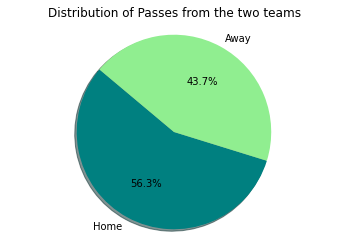

In [711]:
merged_start = merged_start.fillna(0)

# Count the number of rows for each team
team_counts = pass_start['Team'].value_counts()

# Create a pie chart
labels = team_counts.index
sizes = team_counts.values
colors = ["teal", "lightgreen"]

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.title("Distribution of Passes from the two teams")

plt.show()


In [712]:
merged_start

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,Period,Time [s],Away_25,Away_25_y,Away_15,Away_15_y,Away_16,Away_16_y,Away_17,Away_17_y,Away_18,Away_18_y,Away_19,Away_19_y,Away_20,Away_20_y,Away_21,Away_21_y,Away_22,Away_22_y,Away_23,Away_23_y,Away_24,Away_24_y,Away_26,Away_26_y,ball_x,ball_y,Home_11,Home_11_y,Home_1,Home_1_y,Home_2,Home_2_y,Home_3,Home_3_y,Home_4,Home_4_y,Home_5,Home_5_y,Home_6,Home_6_y,Home_7,Home_7_y,Home_8,Home_8_y,Home_9,Home_9_y,Home_10,Home_10_y,Home_12,Home_12_y,Home_13,Home_13_y,Home_14,Home_14_y,next_event,next_subtype,next_team,r_next_event,r_pass_sub,r_len,r_ratio,r_diff,r_pnlt_area,Pass_Rate
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,0,0.00,0.00,0.00,0.00,1,2.04,-52.66610,-0.19924,-12.16032,-21.80148,-20.29900,-4.48800,-19.65982,5.32576,-14.16372,13.10020,-0.53742,-28.19144,-10.55548,-0.69428,-7.10730,8.33000,-0.51834,32.47272,0.22896,-0.25568,-0.46110,9.39828,0.00000,0.00000,0.22896,-0.25568,47.47846,0.68952,15.67422,15.61892,18.82878,5.01160,19.23158,-3.14296,15.30216,-18.46472,7.71998,16.75928,11.09184,1.81016,8.86372,-4.03988,3.51496,-19.48064,0.14840,9.99940,0.04876,-10.41896,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0.0,0.0,0.000000,0.0,0.00,0.0,22.6
1,Away,PASS,0,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68,1,2.04,-52.66610,-0.19924,-12.16032,-21.80148,-20.29900,-4.48800,-19.65982,5.32576,-14.16372,13.10020,-0.53742,-28.19144,-10.55548,-0.69428,-7.10730,8.33000,-0.51834,32.47272,0.22896,-0.25568,-0.46110,9.39828,0.00000,0.00000,0.22896,-0.25568,47.47846,0.68952,15.67422,15.61892,18.82878,5.01160,19.23158,-3.14296,15.30216,-18.46472,7.71998,16.75928,11.09184,1.81016,8.86372,-4.03988,3.51496,-19.48064,0.14840,9.99940,0.04876,-10.41896,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,PASS,0,Away,0.5,0.0,-0.318654,-0.3,0.10,0.0,22.0
2,Away,PASS,0,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04,1,5.84,-51.52024,-0.03672,-8.00088,-20.58088,-18.23518,-4.23368,-17.72744,6.60076,-9.06088,16.44716,5.95508,-24.41948,-7.94258,-0.10472,-1.49248,9.65736,8.00512,33.00516,8.25104,-1.65308,6.73524,6.71160,0.00000,0.00000,-7.96484,-0.13940,44.67476,0.54876,17.66914,16.39616,19.50612,6.51576,16.53070,-3.40476,16.82750,-19.92808,8.31570,18.41304,9.36510,5.10000,7.83976,-2.53436,3.78738,-15.95212,-1.21052,5.04832,-6.67482,-1.05740,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,PASS,0,Away,0.5,0.0,0.572085,0.0,0.00,0.0,59.4
3,Away,PASS,0,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96,1,9.92,-46.15028,1.46064,-5.50034,-18.65512,-18.36132,-4.59680,-18.98566,13.99440,-3.71000,21.29828,7.10094,-20.67812,-1.86242,0.58820,0.29680,17.13736,5.92752,33.04664,16.84022,-1.30560,16.19362,17.93500,0.00000,0.00000,-3.69410,21.26428,40.84816,3.32044,15.26188,24.71664,20.15060,15.48360,19.03442,0.98464,19.58880,-11.85444,-0.46852,23.49944,9.35980,18.10908,11.47556,5.53112,8.12808,-8.09132,-1.91012,15.59376,-3.82978,3.77468,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,PASS,0,Away,0.5,0.0,-0.540913,0.0,0.00,0.0,21.2
4,Away,PASS,0,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44,1,12.64,-43.75362,2.32084,-9.60466,-24.62756,-23.54578,-5.12856,-21.90914,12.47460,-5.91162,27.56992,9.23366,-25.81212,-4.45200,-1.00776,-7.42106,13.84208,7.20906,31.88316,15.20888,-4.97080,13.39628,14.27592,0.00000,0.00000,-21.83176,12.56504,38.04976,2.12636,14.41600,21.66820,16.04204,8.56460,15.39332,-2.01892,16.33460,-18.67960,-2.85140,18.77480,4.47532,10.97316,2.84716,0.59908,3.93048,-13.63128,-8.25316,10.34824,-8.82874,-2.27868,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,PASS,0,Away,0.5,0.0,-0.538911,0.0,-0.05,0.0,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

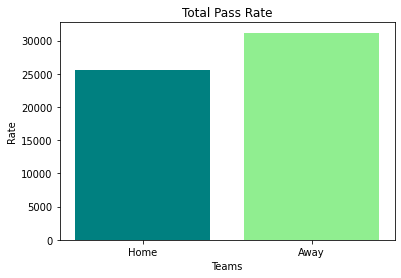

25541.800000000003

In [713]:
# Calculate the sum of Pass_Rate for the Away team separately for the Home team
home = merged_start.loc[merged_start['Team'] == 'Away']['Pass_Rate'].sum()
away = merged_start.loc[merged_start['Team'] == 'Home']['Pass_Rate'].sum()

# Create a bar plot with custom colors
colors = ['teal', 'lightgreen']
plt.bar(['Home', 'Away'], [home, away], color=colors)
plt.xlabel('Teams')
plt.ylabel('Rate')
plt.title('Total Pass Rate')
plt.show()

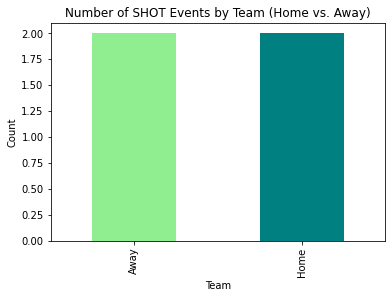

In [714]:
#Filter the DataFrame to select rows with Type 'SHOT' and Subtype 'ON TARGET-GOAL'
filtered_df = merged_start[(merged_start['Type'] == 'SHOT') & (merged_start['Subtype'] == 'ON TARGET-GOAL')]

# Count the occurrences of 'Team' values in the filtered DataFrame
team_counts = filtered_df['Team'].value_counts()

# Create a bar plot
team_counts.plot(kind='bar', color=['lightgreen','teal'])

# Set plot labels and title
plt.title('Number of SHOT Events by Team (Home vs. Away)')
plt.xlabel('Team')
plt.ylabel('Count')

# Show the plot
plt.show()

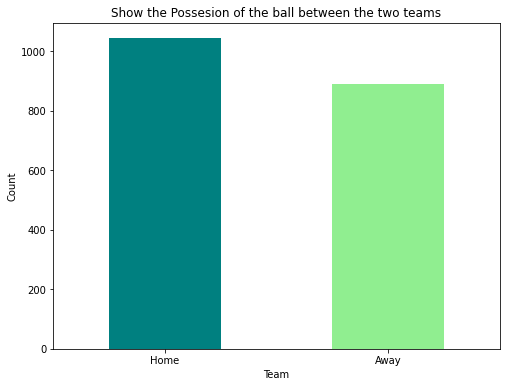

In [715]:
# Step 1: Filter the DataFrame to remove specified rows
filter_conditions = (
    (merged_start['Type'] != 'BALL LOST') |
    (merged_start['Type'] != 'CHALLENGE') |
    (merged_start['Subtype'] != 'TACKLE-FAULT-LOST') |
    (merged_start['Subtype'] != 'TACKLE-LOST') |
    (merged_start['Subtype'] != 'GROUND-FAULT-WON') |
    (merged_start['Subtype'] != 'GROUND-FAULT-LOST') |
    (merged_start['Subtype'] != 'AERIAL-LOST') |
    (merged_start['Subtype'] != 'TACKLE-LOST') |
    (merged_start['Subtype'] != 'GROUND-LOST') |
    (merged_start['Subtype'] != 'TACKLE-FAULT-WON') 
)

filtered_merged_start = merged_start[filter_conditions]

# Step 2: Calculate the counts for 'Away' and 'Home' teams
team_counts = filtered_merged_start['Team'].value_counts()

# Step 3: Plot the results
plt.figure(figsize=(8, 6))
team_counts.plot(kind='bar', color=['teal', 'lightgreen'])
plt.title('Show the Possesion of the ball between the two teams')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


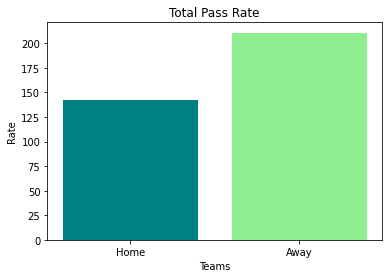

In [716]:
# Calculate the sum of Pass_Rate for the Away team separately for the Home team
pass_rate_for_home = merged_start.loc[merged_start['Team'] == 'Away']['r_next_event'].sum()
pass_rate_for_away = merged_start.loc[merged_start['Team'] == 'Home']['r_next_event'].sum()

# Create a bar plot with custom colors
colors = ['teal', 'lightgreen']
plt.bar(['Home', 'Away'], [pass_rate_for_home, pass_rate_for_away], color=colors)
plt.xlabel('Teams')
plt.ylabel('Rate')
plt.title('Total Pass Rate')
plt.show()

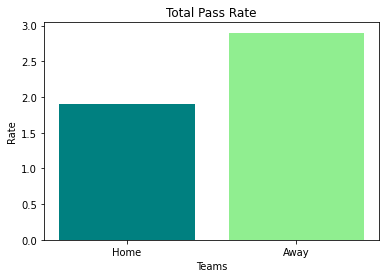

In [717]:
# Calculate the sum of Pass_Rate for the Away team separately for the Home team
pass_rate_for_home = merged_start.loc[merged_start['Team'] == 'Away']['r_pass_sub'].sum()
pass_rate_for_away = merged_start.loc[merged_start['Team'] == 'Home']['r_pass_sub'].sum()

# Create a bar plot with custom colors
colors = ['teal', 'lightgreen']
plt.bar(['Home', 'Away'], [pass_rate_for_home, pass_rate_for_away], color=colors)
plt.xlabel('Teams')
plt.ylabel('Rate')
plt.title('Total Pass Rate')
plt.show()

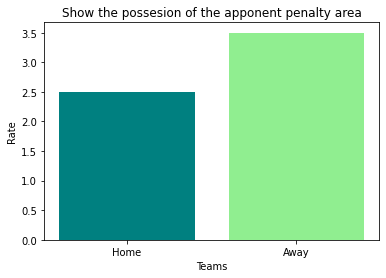

In [718]:
# Calculate the sum of Pass_Rate for the Away team separately for the Home team
home = merged_start.loc[merged_start['Team'] == 'Away']['r_pnlt_area'].sum()
away = merged_start.loc[merged_start['Team'] == 'Home']['r_pnlt_area'].sum()

# Create a bar plot with custom colors
colors = ['teal', 'lightgreen']
plt.bar(['Home', 'Away'], [home, away], color=colors)
plt.xlabel('Teams')
plt.ylabel('Rate')
plt.title('Show the possesion of the apponent penalty area')
plt.show()

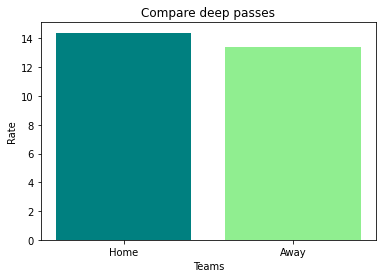

In [719]:
# Calculate the sum of Pass_Rate for the Away team separately for the Home team
pass_rate_for_home = merged_start.loc[merged_start['Team'] == 'Away']['r_len'].sum()
pass_rate_for_away = merged_start.loc[merged_start['Team'] == 'Home']['r_len'].sum()

# Create a bar plot with custom colors
colors = ['teal', 'lightgreen']
plt.bar(['Home', 'Away'], [pass_rate_for_home, pass_rate_for_away], color=colors)
plt.xlabel('Teams')
plt.ylabel('Rate')
plt.title('Compare deep passes')
plt.show()

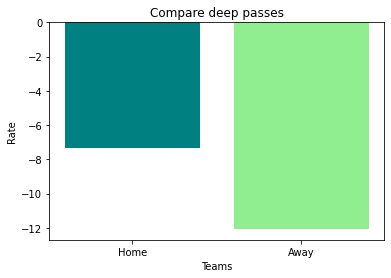

In [720]:
# Calculate the sum of Pass_Rate for the Away team separately for the Home team
pass_rate_for_home = merged_start.loc[merged_start['Team'] == 'Away']['r_diff'].sum()
pass_rate_for_away = merged_start.loc[merged_start['Team'] == 'Home']['r_diff'].sum()

# Create a bar plot with custom colors
colors = ['teal', 'lightgreen']
plt.bar(['Home', 'Away'], [pass_rate_for_home, pass_rate_for_away], color=colors)
plt.xlabel('Teams')
plt.ylabel('Rate')
plt.title('Compare deep passes')
plt.show()

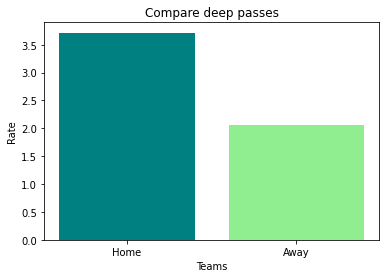

In [721]:
# Calculate the sum of Pass_Rate for the Away team separately for the Home team
pass_rate_for_home = merged_start.loc[merged_start['Team'] == 'Away']['r_ratio'].sum()
pass_rate_for_away = merged_start.loc[merged_start['Team'] == 'Home']['r_ratio'].sum()

# Create a bar plot with custom colors
colors = ['teal', 'lightgreen']
plt.bar(['Home', 'Away'], [pass_rate_for_home, pass_rate_for_away], color=colors)
plt.xlabel('Teams')
plt.ylabel('Rate')
plt.title('Compare deep passes')
plt.show()